# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


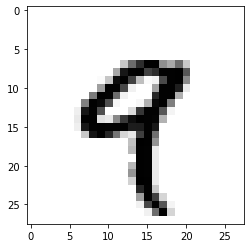

In [7]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[4], cmap = plt.cm.binary)

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(32,3,3, activation = 'relu', input_shape = (28,28,1)))
model.add(Convolution2D(64,3,3, activation='relu'))
model.add(Convolution2D(128,3,3, activation='relu'))
model.add(Convolution2D(256,3,3, activation='relu'))
model.add(Convolution2D(512,3,3, activation='relu'))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 16))
model.add( MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  


In [0]:
# from keras.layers import Activation
# model = Sequential()

 
# model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
# model.add(Convolution2D(64,10, 1, activation='relu'))
# model.add(Convolution2D(10, 26))
# model.add(Flatten())
# model.add(Activation('softmax'))

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 20, 20, 256)       295168    
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 18, 18, 512)       1180160   
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 18, 18, 10)        5130      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 3, 3, 10)         

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=30, nb_epoch=13, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/13
60000/60000 [==============================] - 88s 1ms/step - loss: 0.1447 - acc: 0.9574
Epoch 2/13
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0601 - acc: 0.9825
Epoch 3/13
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0460 - acc: 0.9864
Epoch 4/13
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0358 - acc: 0.9893
Epoch 5/13
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0297 - acc: 0.9909
Epoch 6/13
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0247 - acc: 0.9921
Epoch 7/13
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0205 - acc: 0.9938
Epoch 8/13
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0174 - acc: 0.9944
Epoch 9/13
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0158 - acc: 0.9946
Epoch 10/13
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0130 - acc: 0.9956

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.03260548618828516, 0.9917]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[5.94529412e-27 4.07859626e-36 1.33525837e-16 1.55089299e-12
  6.27177526e-34 1.47336664e-27 0.00000000e+00 9.99956131e-01
  9.61967848e-23 1.24412658e-18 1.00589393e-30 6.34918478e-36
  2.43844403e-21 1.42649216e-16 1.67186723e-37 4.39562308e-35
  0.00000000e+00 4.16931944e-05 3.84551335e-29 8.53608932e-25
  5.91412560e-34 4.45765178e-32 1.98276959e-25 8.96591486e-22
  0.00000000e+00 0.00000000e+00 0.00000000e+00 9.96637911e-11
  1.85498195e-32 5.81268817e-28 1.37478160e-33 1.79580923e-36
  1.14064678e-19 1.08949334e-18 0.00000000e+00 0.00000000e+00
  0.00000000e+00 2.18585274e-06 2.80483165e-30 1.07494509e-26
  6.74403697e-38 1.21820952e-37 4.36536643e-25 3.14800308e-23
  0.00000000e+00 0.00000000e+00 0.00000000e+00 9.93157206e-12
  1.46913369e-36 2.39693031e-31 0.00000000e+00 9.27543964e-36
  1.50781010e-29 6.41340565e-27 0.00000000e+00 0.00000000e+00
  0.00000000e+00 2.12815142e-17 0.00000000e+00 2.92984631e-36
  0.00000000e+00 4.62207396e-38 4.77538172e-24 4.47173323e-26
  0.0000

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored